In [1]:
import json
import numpy as np
import scipy as sp
import pandas as pd
import pydash

from matplotlib import pyplot as plt

import ipywidgets as widgets

In [2]:
data_path = "../data/athlete_events.csv"

In [3]:
df = pd.read_csv(data_path).dropna()

In [4]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


(array([  48.,  344., 2027., 5704., 8642., 8811., 3335., 1081.,  158.,
          31.]),
 array([136. , 144.7, 153.4, 162.1, 170.8, 179.5, 188.2, 196.9, 205.6,
        214.3, 223. ]),
 <a list of 10 Patch objects>)

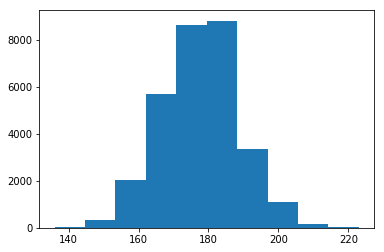

In [5]:
plt.hist(df["Height"])

In [12]:
def make_plot(multiplier, difference, residual_quartiles):
    outlier = difference < residual_quartiles[1] - (residual_quartiles[3]-residual_quartiles[1]) * multiplier
    fig, ax = plt.subplots(1, 1, figsize=(12, 6));
    ax.hist(difference, bins=30)
    ax.axvline(residual_quartiles[1] - (residual_quartiles[3]-residual_quartiles[1]) * multiplier, color='k', linestyle='dashed', linewidth=1)
    ax.axvline(residual_quartiles[1], color='k', linestyle='dashed', linewidth=1)
    ax.axvline(residual_quartiles[2], color='k', linestyle='dashed', linewidth=1)
    ax.axvline(residual_quartiles[3], color='k', linestyle='dashed', linewidth=1)
    ax.axvline(residual_quartiles[3] + (residual_quartiles[3]-residual_quartiles[1]) * multiplier, color='k', linestyle='dashed', linewidth=1)
    
    plt.show()
    
def make_outlier_widget(difference, residual_quartiles):
    def set_multiplier(multiplier):
        make_plot(multiplier, difference, residual_quartiles)
    return set_multiplier

In [13]:
widgets.interact(
    make_outlier_widget(df["Height"].values, np.percentile(df["Height"].values, [0, 25, 50, 75, 100])),
    multiplier = widgets.FloatSlider(
        value=1,
        min=0.5,
        max=1.5,
        step=0.1,
        description='IQR multiplier:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
    )
)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='IQR multiplier:', max=1.5, …

<function __main__.make_outlier_widget.<locals>.set_multiplier(multiplier)>